In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import warnings
warnings.filterwarnings ("ignore")



C:\Users\carva\AppData\Local\Temp\ipykernel_11340\2246009126.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_d = pd.read_csv("../../Dados/treino.csv")

In [3]:
train_d

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [4]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [5]:
train_d['Crop_Damage'].value_counts()

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64


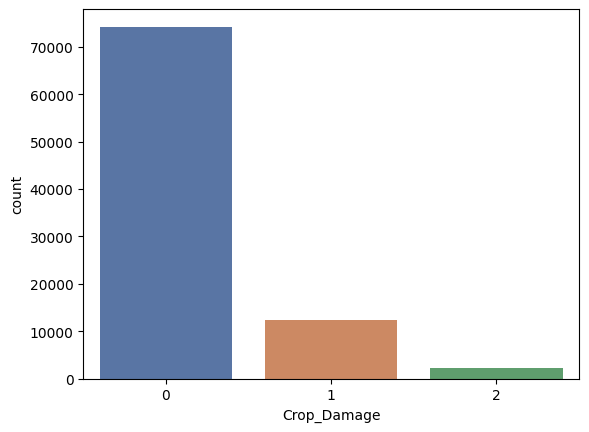

In [6]:
print (train_d['Crop_Damage'].value_counts().sort_index())
# codes colors = deep , muted , pastel, dark , bright, colorblind
ax = sns.countplot(x=train_d['Crop_Damage'], palette='deep')

Pesticide_Use_Category
1      837
2    63709
3    24312
Name: count, dtype: int64


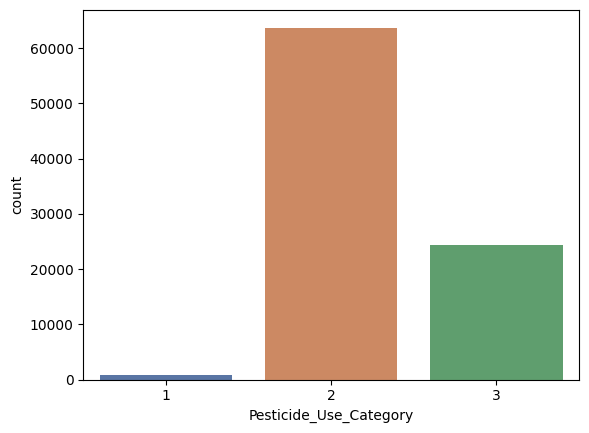

In [7]:
print (train_d['Pesticide_Use_Category'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Pesticide_Use_Category'],palette='deep')

Season
1    26902
2    44210
3    17746
Name: count, dtype: int64


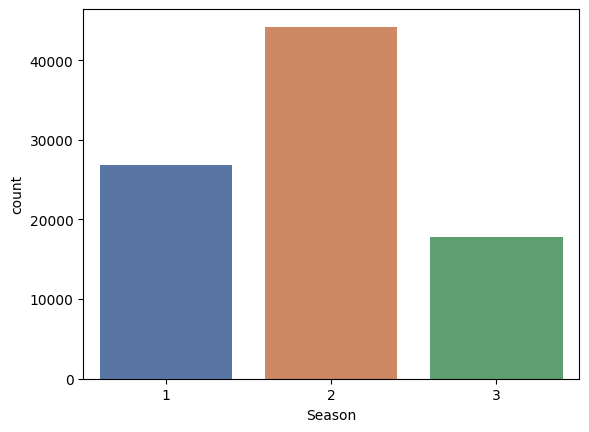

In [8]:
print (train_d['Season'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Season'], palette='deep')

Crop_Type
0    63589
1    25269
Name: count, dtype: int64


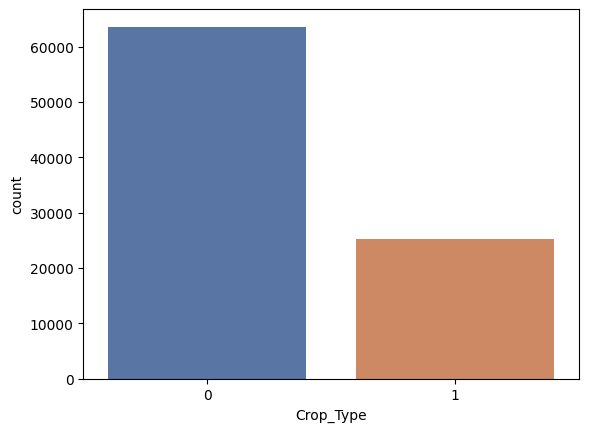

In [9]:
print (train_d['Crop_Type'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Crop_Type'],palette='deep')

Soil_Type
0    48124
1    40734
Name: count, dtype: int64


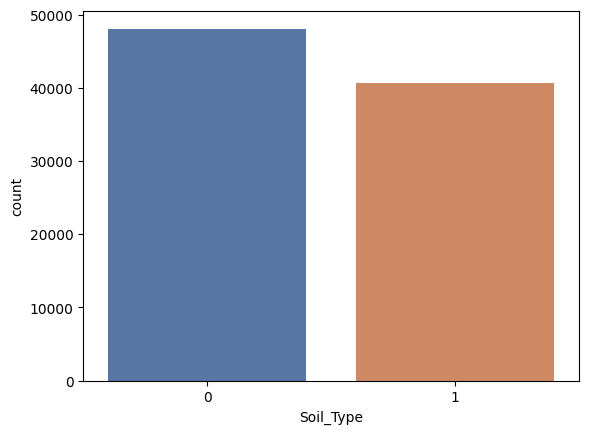

In [10]:
print (train_d['Soil_Type'].value_counts().sort_index())
ax = sns.countplot(x=train_d['Soil_Type'],palette='deep')

In [11]:
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [12]:
train_d['Number_Weeks_Used_Missing'] = train_d['Number_Weeks_Used'].isnull()
missing_proportion = train_d.groupby('Crop_Damage')['Number_Weeks_Used_Missing'].sum().reset_index()
missing_proportion

,Crop_Damage,Number_Weeks_Used_Missing
0,0,7495
1,1,1248
2,2,257


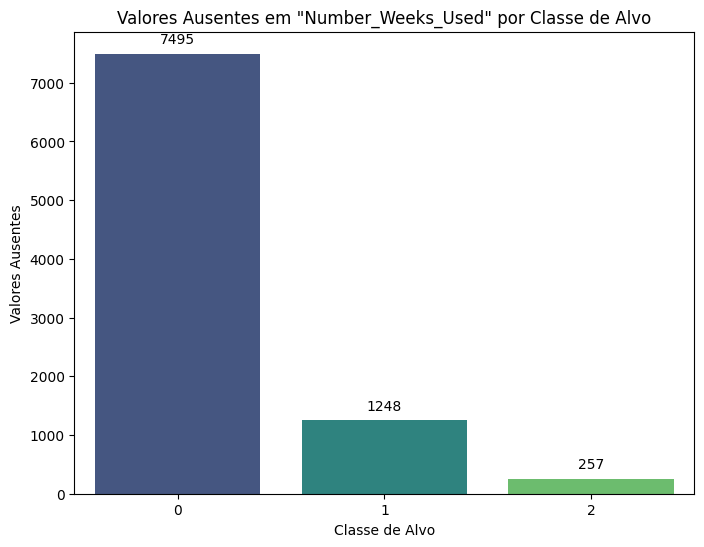

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Crop_Damage', y='Number_Weeks_Used_Missing', data=missing_proportion, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(title='Valores Ausentes em "Number_Weeks_Used" por Classe de Alvo', xlabel='Classe de Alvo', ylabel='Valores Ausentes')
plt.show()


In [14]:
train_d.groupby('Crop_Damage')['Number_Weeks_Used'].sum()

Crop_Damage
0    1825397.0
1     382528.0
2      77928.0
Name: Number_Weeks_Used, dtype: float64

In [15]:
train_d['Number_Weeks_Used']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
88853    12.0
88854    20.0
88855    40.0
88856    25.0
88857    37.0
Name: Number_Weeks_Used, Length: 88858, dtype: float64

In [16]:
train_d.nunique()

ID                           88858
Estimated_Insects_Count         71
Crop_Type                        2
Soil_Type                        2
Pesticide_Use_Category           3
Number_Doses_Week               20
Number_Weeks_Used               64
Number_Weeks_Quit               51
Season                           3
Crop_Damage                      3
Number_Weeks_Used_Missing        2
dtype: int64

In [17]:
# Criar uma função de imputação
def imputar(df):
    if df['Number_Weeks_Used'].isnull().any():
        df['Number_Weeks_Used'] = df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean())
    return df

# Aplicar a função de imputação usando apply
df = train_d.groupby('Crop_Damage', group_keys=False).apply(imputar)


In [18]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used            0
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
Number_Weeks_Used_Missing    0
dtype: int64

In [19]:
df['Number_Weeks_Used'].to_frame()

,Number_Weeks_Used
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
88853,12.0
88854,20.0
88855,40.0
88856,25.0


In [20]:
df.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Number_Weeks_Used_Missing
0,F00000001,188,1,0,1,0,0.0,0,1,0,False
1,F00000003,209,1,0,1,0,0.0,0,2,1,False
2,F00000004,257,1,0,1,0,0.0,0,2,1,False
3,F00000005,257,1,1,1,0,0.0,0,2,1,False
4,F00000006,342,1,0,1,0,0.0,0,2,1,False


In [21]:
df.duplicated().sum()

0

count    88858.000000
mean      1399.012210
std        849.048781
min        150.000000
25%        731.000000
50%       1212.000000
75%       1898.000000
max       4097.000000
Name: Estimated_Insects_Count, dtype: float64


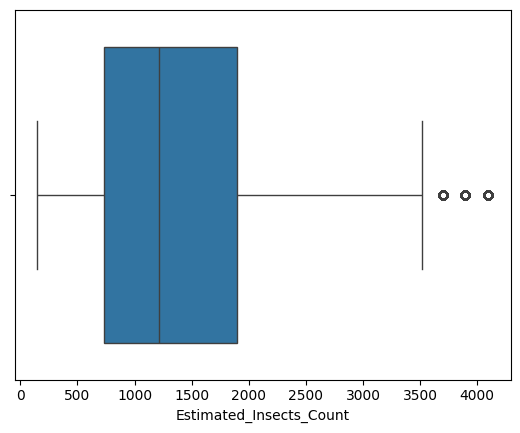

In [22]:
print (df['Estimated_Insects_Count'].describe())
ax = sns.boxplot(x=df['Estimated_Insects_Count'])

count    88858.000000
mean        28.627108
std         11.785210
min          0.000000
25%         20.000000
50%         27.349640
75%         36.000000
max         67.000000
Name: Number_Weeks_Used, dtype: float64


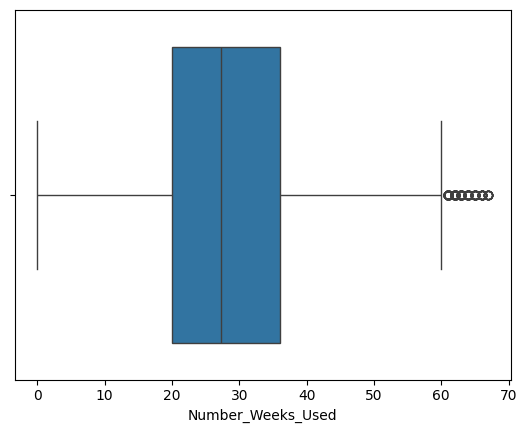

In [23]:
print (df['Number_Weeks_Used'].describe())
ax = sns.boxplot(x=df['Number_Weeks_Used'])

count    88858.000000
mean         9.589986
std          9.900631
min          0.000000
25%          0.000000
50%          7.000000
75%         16.000000
max         50.000000
Name: Number_Weeks_Quit, dtype: float64


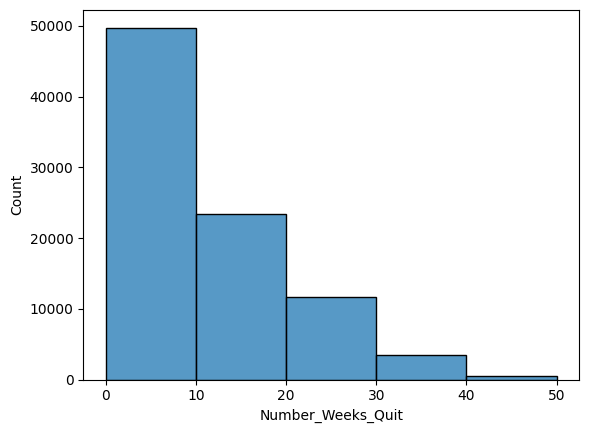

In [24]:
print (df['Number_Weeks_Quit'].describe())
ax = sns.histplot(x=df['Number_Weeks_Quit'],bins=5)

In [25]:
df.drop (['ID','Number_Weeks_Used_Missing'] ,axis=1,inplace=True)
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [26]:
# Engenharia de variáveis
for col in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']:
    df = pd.get_dummies(df,columns=[col])

In [27]:
df.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0,False,True,True,False,True,False,False,True,False,False
1,209,0,0.0,0,1,False,True,True,False,True,False,False,False,True,False
2,257,0,0.0,0,1,False,True,True,False,True,False,False,False,True,False
3,257,0,0.0,0,1,False,True,False,True,True,False,False,False,True,False
4,342,0,0.0,0,1,False,True,True,False,True,False,False,False,True,False


In [28]:
X = df.drop(['Crop_Damage'],axis=1)
y = df['Crop_Damage'].values.reshape(-1,1)

In [29]:
# Balanceando os dados com over_sampling (aumentando sintéticos minoritários)
ada = ADASYN(random_state=42)
X_res , y_res = ada.fit_resample(X,y)

<Axes: ylabel='count'>

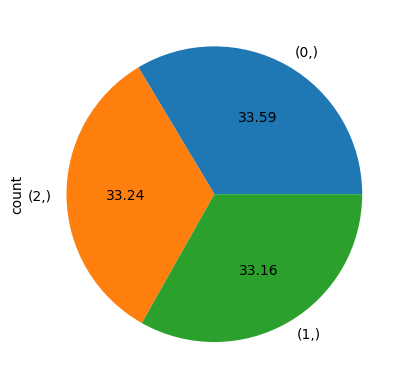

In [30]:
df_y = pd.DataFrame(y_res)
df_y.value_counts().plot.pie(autopct='%.2f')

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X_res,y_res,test_size=0.3,random_state=42,stratify=y_res, shuffle=True)

In [39]:
X_test, X_test_final, y_test, y_test_final = train_test_split(X_temp,y_temp,test_size=0.2,random_state=42,stratify=y_temp, shuffle=True)

In [40]:
X_train.shape

(154693, 14)

In [41]:
X_test.shape

(53038, 14)

In [42]:
X_test_final.shape

(13260, 14)